In [1]:
!pip install tensorflow

In [2]:
import tensorflow

In [4]:
from tensorflow import keras

In [5]:
from tensorflow.keras import Sequential

In [6]:
from tensorflow.keras.layers import Dense,Flatten

In [8]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
X_train.shape

(60000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

In [14]:
import matplotlib.pyplot as plt

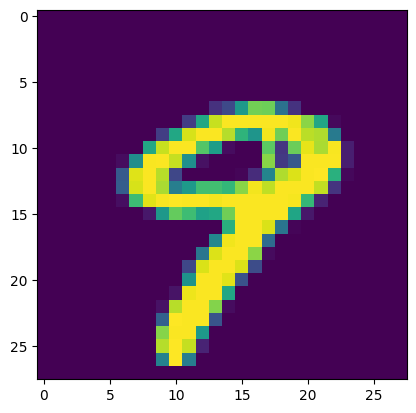

In [17]:
plt.imshow(X_test[9])

In [19]:
# Normalize the X_train and X_test
X_train=X_train/255
X_test=X_test/255

In [20]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [25]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2845 - accuracy: 0.9168 - val_loss: 0.1474 - val_accuracy: 0.9567
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1225 - accuracy: 0.9629 - val_loss: 0.1128 - val_accuracy: 0.9671
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0818 - accuracy: 0.9751 - val_loss: 0.1136 - val_accuracy: 0.9668
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0633 - accuracy: 0.9803 - val_loss: 0.1105 - val_accuracy: 0.9678
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.0960 - val_accuracy: 0.9732
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.0888 - val_accuracy: 0.9762
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0314 - accuracy: 0.9905 - val_loss: 0.1131 - val_accuracy:

In [26]:
prob=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [27]:
y_pred=prob.argmax(axis=1)

In [28]:
y_pred[0]

7

In [30]:
y_pred[4]

4

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

0.9786

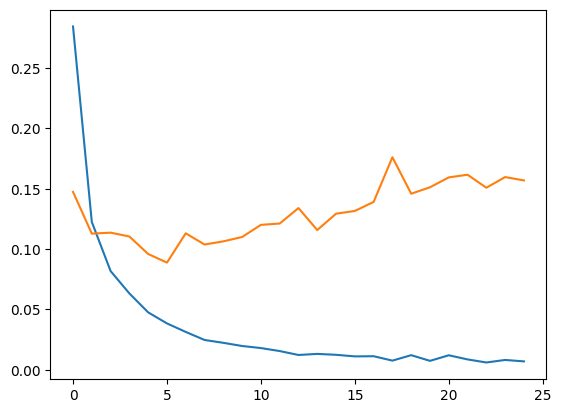

In [35]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

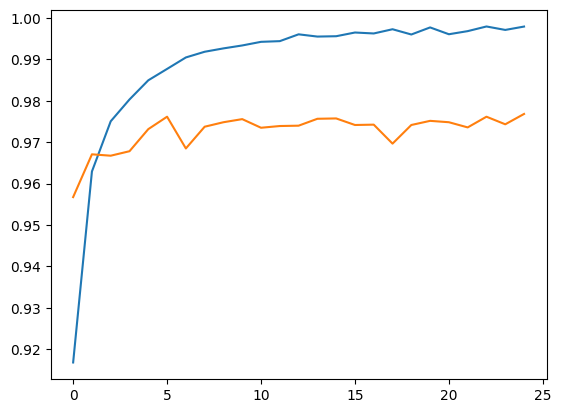

In [36]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [37]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 81ms/step


array([2])

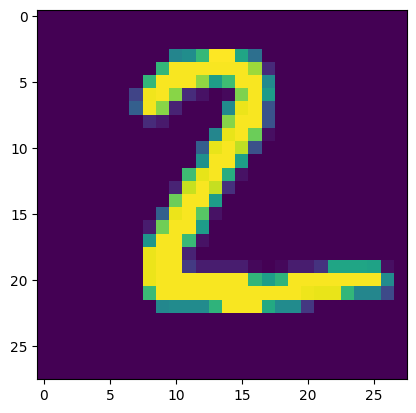

In [38]:
plt.imshow(X_test[1])